<a href="https://colab.research.google.com/github/vidhigambhir/SQL-PROJECT-/blob/main/TCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
pip install pandas


In [29]:
pip install matplotlib

In [30]:
pip install seaborn

In [31]:
pip install numpy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files


uploaded = files.upload()

Saving Customer Churn.csv to Customer Churn.csv


In [3]:

import io

df = pd.read_csv(io.BytesIO(uploaded['Customer Churn.csv']))
print(df)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df["TotalCharges"]= df["TotalCharges"].replace(" ","0")

In [6]:
df["TotalCharges"]= df["TotalCharges"].astype("float")

In [7]:
df.isnull(). sum().sum()

np.int64(0)

checked if there are null values

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
df["customerID"].duplicated().sum()

np.int64(0)

In [10]:
def conv(value):
  if value==1:
    return "yes"
  else:
    return "no"

df['SeniorCitizen']= df["SeniorCitizen"].apply(conv)

In [17]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


converted 0 and 1 to to yes/no

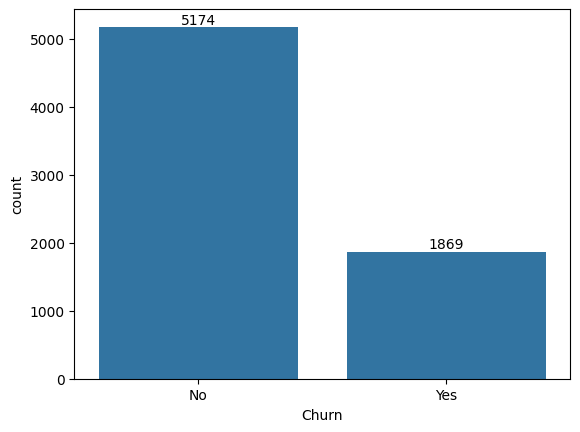

In [11]:
ax = sns.countplot(x="Churn", data=df)


ax.bar_label(ax.containers[0])
plt.show()

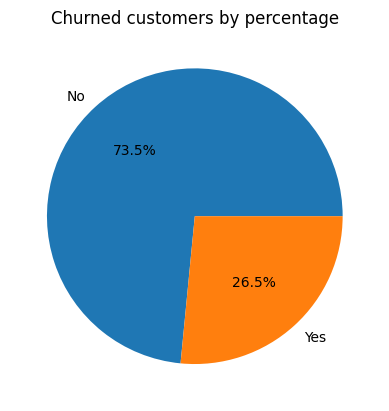

In [12]:
gb=df.groupby("Churn").agg({'Churn':'count'})
plt.pie(gb['Churn'], labels = gb.index, autopct='%1.1f%%')
plt.title('Churned customers by percentage')
plt.show()

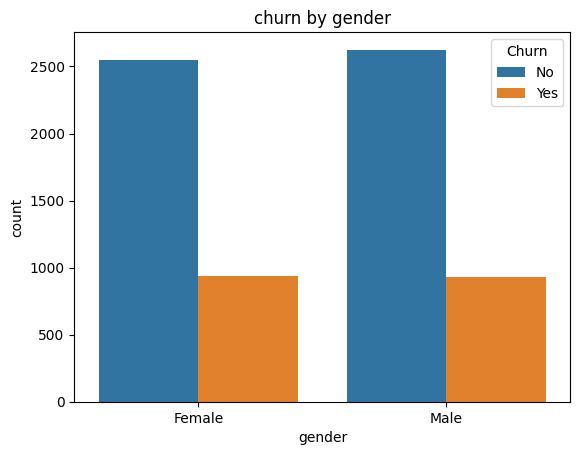

In [13]:
sns.countplot(x="gender", data=df, hue='Churn')
plt.title('churn by gender')
plt.show()

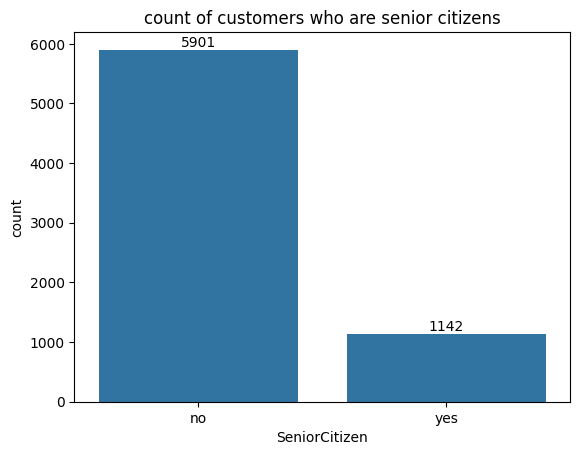

In [14]:
ax = sns.countplot(x="SeniorCitizen", data=df)


ax.bar_label(ax.containers[0])
plt.title("count of customers who are senior citizens")
plt.show()

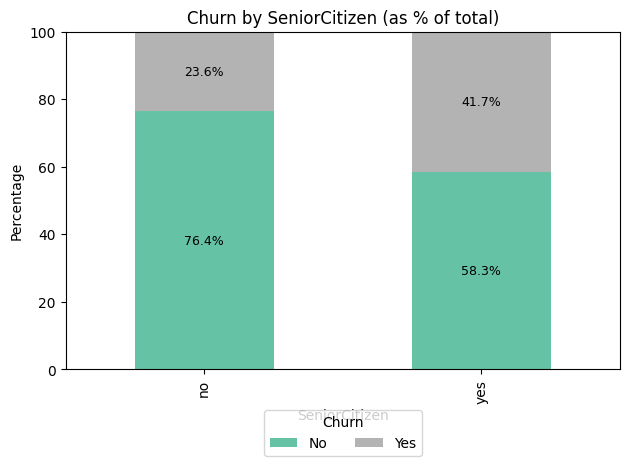

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Create a frequency table
counts = pd.crosstab(df['SeniorCitizen'], df['Churn'])

# 2. Normalize to get percentage
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# 3. Plot the stacked bar chart
ax = percentages.plot(kind='bar', stacked=True, colormap='Set2')

# 4. Add percentage labels
for i, row in enumerate(percentages.values):
    cumulative = 0
    for j, val in enumerate(row):
        if val > 0:
            ax.text(i, cumulative + val / 2, f'{val:.1f}%', ha='center', va='center', fontsize=9)
            cumulative += val

# 5. Format the plot
plt.title('Churn by SeniorCitizen (as % of total)')
plt.ylabel('Percentage')
plt.xlabel('SeniorCitizen')
plt.ylim(0, 100)
plt.legend(title='Churn', loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.tight_layout()
plt.show()


comparatively a greater percent of senior citizens have churned.


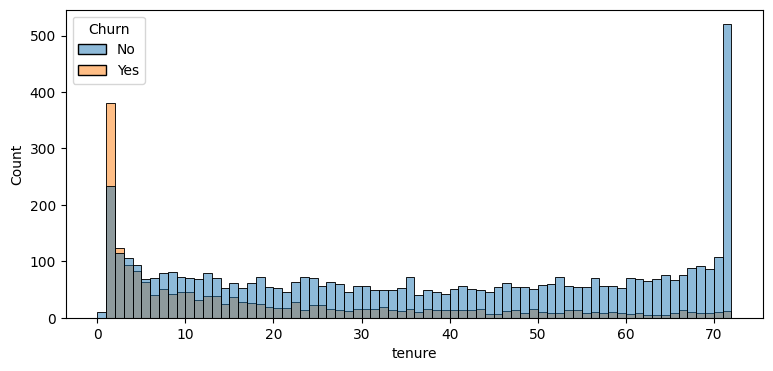

In [17]:
plt.figure(figsize=(9,4))
sns.histplot(x="tenure",data=df,bins=72, hue="Churn")
plt.show()

short term users have churned initially long term users stayed


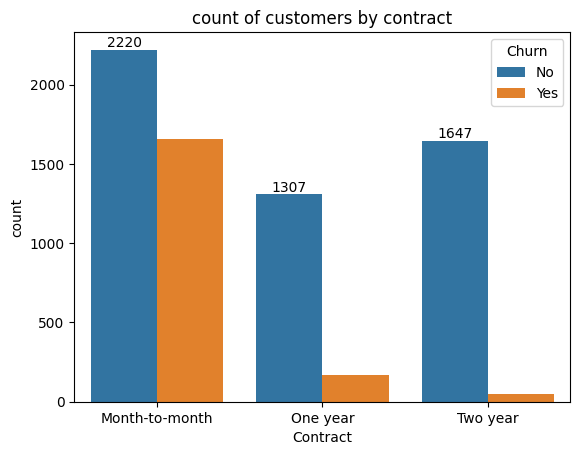

In [20]:
ax = sns.countplot(x="Contract", data=df,hue="Churn")


ax.bar_label(ax.containers[0])
plt.title("count of customers by contract")
plt.show()

people for month-to-month contract are likely to churn more


In [21]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

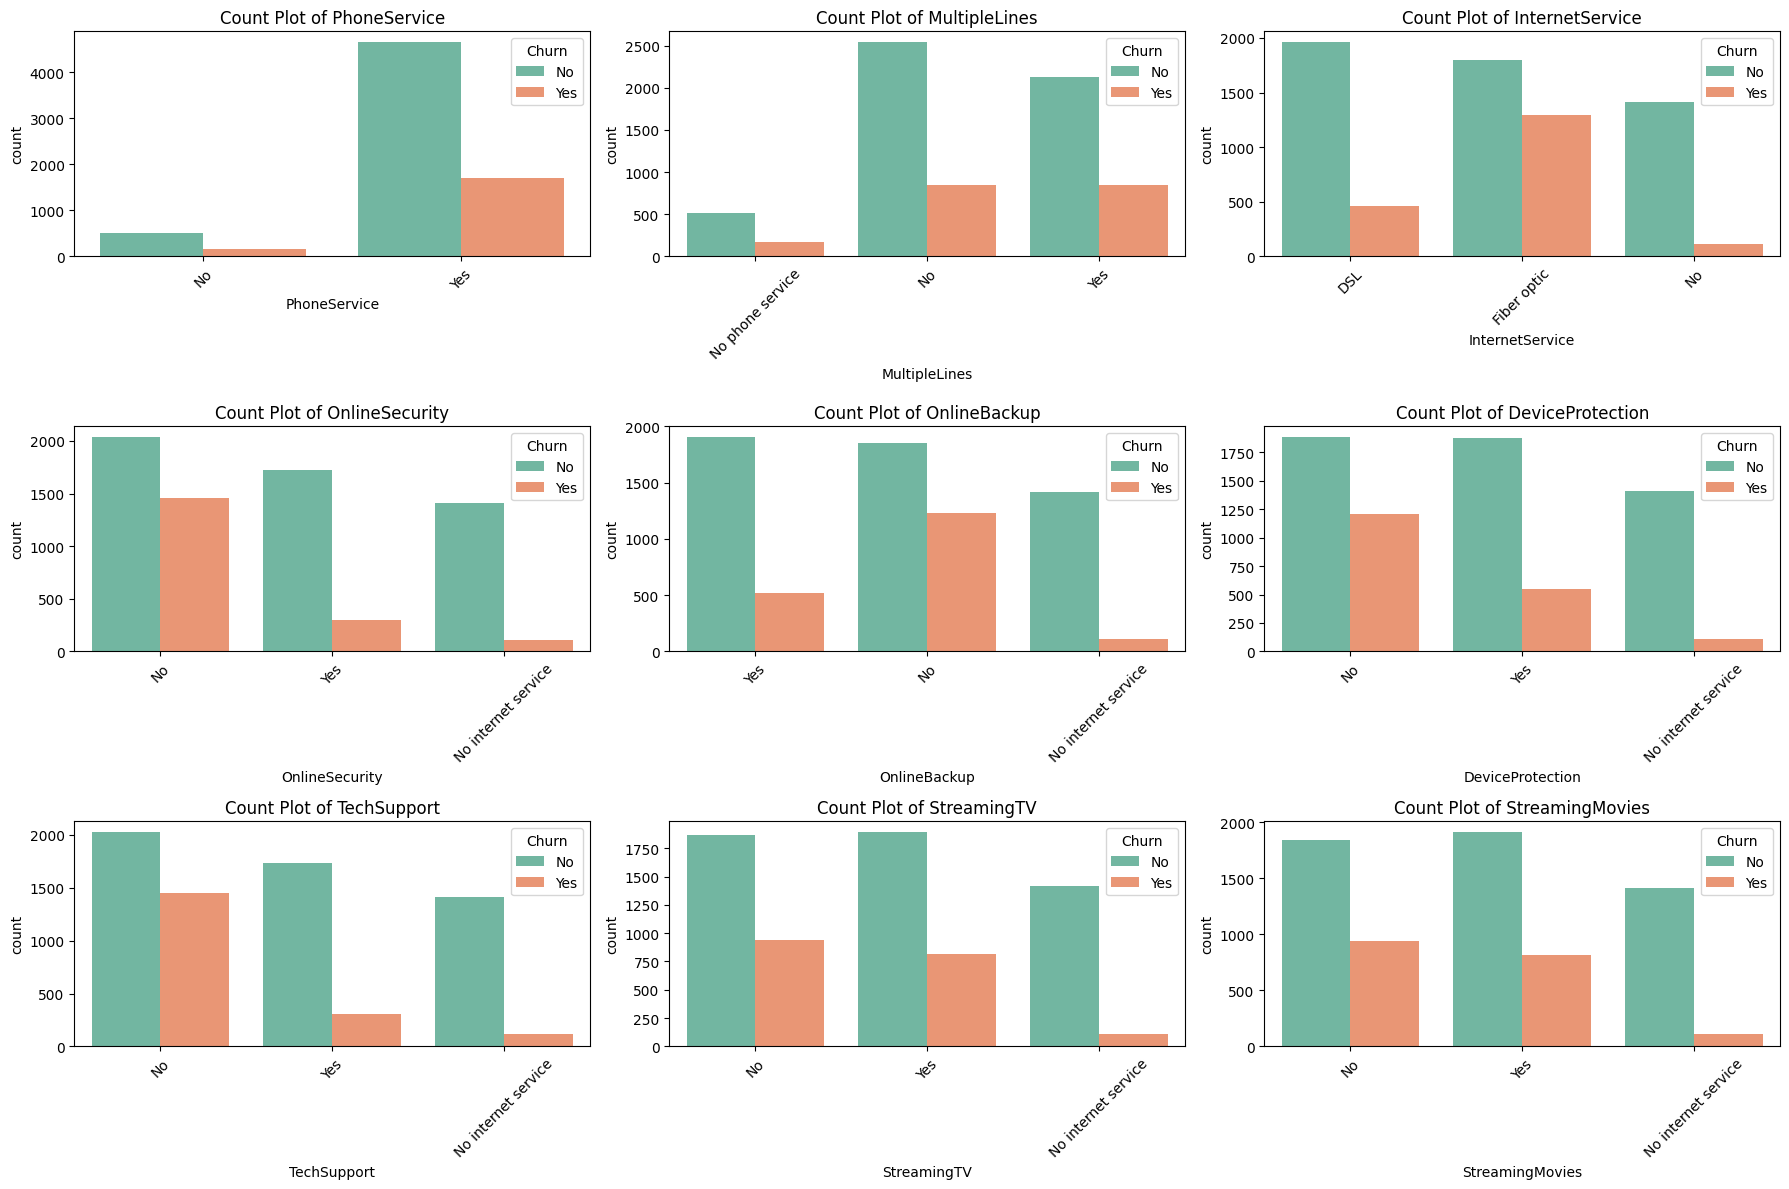

In [23]:


# List of columns to plot
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Define subplot grid (3 rows x 3 columns for 9 plots)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axes = axes.flatten()  # Flatten 2D axes array for easy iteration

# Loop through each column and plot
for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, ax=axes[i], palette='Set2',hue="Churn")
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


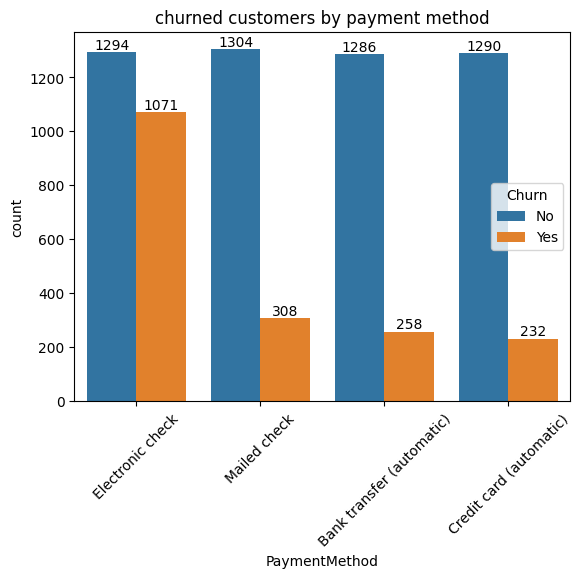

In [27]:
ax = sns.countplot(x="PaymentMethod", data=df,hue="Churn")


ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("churned customers by payment method")
plt.xticks(rotation=45)
plt.show()

person likely to churn who uses electronic check method